In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Read the image

image = cv2.imread("parrot.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Sampling

Sampling refers to the process of converting a continuous image into a discrete representation by selecting pixel values at regular intervals. This involves defining a grid (sampling points) over the image and recording intensity values (like color or brightness) at each grid point.

The level of sampling determines the resolution of the digital image:

**Higher sampling rate:** Captures more detail, resulting in a high-resolution image.

**Lower sampling rate:** Reduces detail and may cause pixelation (loss of quality).

In [17]:
# Define the sampling Function

def ImageSampling(image, samplingFactor):
    sampledImage = image[::samplingFactor, ::samplingFactor]
    return sampledImage

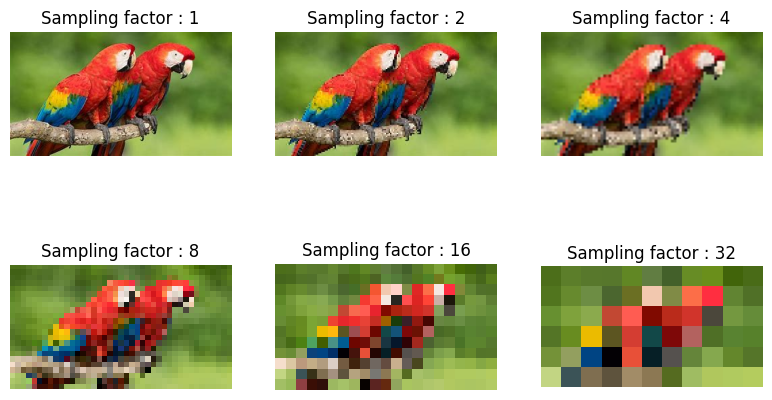

In [19]:
ax = plt.subplot(2,3,1)
ax.set_title("Sampling factor : 1")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=1))

ax = plt.subplot(2,3,2)
ax.set_title("Sampling factor : 2")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=2))

ax = plt.subplot(2,3,3)
ax.set_title("Sampling factor : 4")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=4))

ax = plt.subplot(2,3,4)
ax.set_title("Sampling factor : 8")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=8))

ax = plt.subplot(2,3,5)
ax.set_title("Sampling factor : 16")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=16))

ax = plt.subplot(2,3,6)
ax.set_title("Sampling factor : 32")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=32))

plt.subplots_adjust(right= 1.3, top=1)

### Quantization

quantization is the process of mapping a large range of continuous intensity values (like brightness or color) to a smaller, finite range of discrete levels.

In [22]:
# Define the quantization function

def ImageQuantization(image, levels):
    step = 255 // (levels - 1)                             # Divide by (levels-1) to get the step value for quantization
    quantized_image = np.round(image / step) * step        # Apply quantization by rounding pixel values to the nearest step
    quantized_image = np.uint8(quantized_image)
    return quantized_image

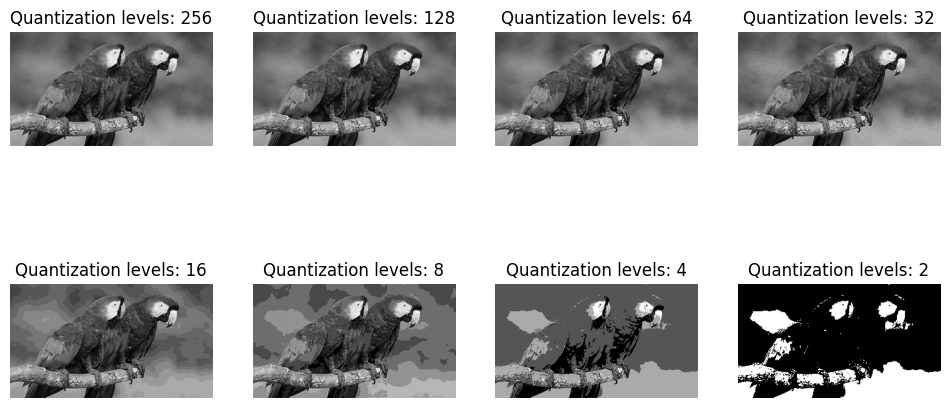

<Figure size 640x480 with 0 Axes>

In [21]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
levels = [256, 128, 64, 32, 16, 8, 4, 2]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for i, level in enumerate(levels, start=1):
    ax = axs.flatten()[i-1]
    ax.set_title("Quantization levels: {}".format(level))
    ax.imshow(ImageQuantization(image, level), cmap="gray")
    ax.axis('off')

plt.show()
plt.savefig('Quantization.png')